In [103]:
# Required Imports
import matplotlib.pyplot as plt
from skimage import io, color, filters, transform, feature, measure, data
from skimage.color import * #rgb2gray
import numpy as np

In [104]:
# Import provided image as img
img_location = "/content/Ondra_sampling.jpg" # Change this location to where your image is stored
                                             #  I uploaded the image to Colab and this is its temp location
img = io.imread(img_location)
img_original = ("Original (color)", (img, {})) # Used for static display

In [105]:
# Default function to display images on plot
# Images:
#   ("Title", image, Grayscale=False)
def display_images(images):
  rows = 1
  cols = len(images)
  fig, axes = plt.subplots(rows, cols, figsize=(10,10))
  ax = axes.ravel()

  i = 0
  for n,p in images:
    ax[i].set_title(n)
    ax[i].imshow(p[0], **p[1])
    i += 1

  fig.tight_layout()
  plt.show()

def display_plot(graphs):
  rows = 1
  cols = len(graphs)
  fig, axes = plt.subplots(rows, cols, figsize=(10,10))
  ax = axes.ravel()

  for i, graph in enumerate(graphs):
    ax[i].plot(graph)

  fig.tight_layout()
  plt.show()

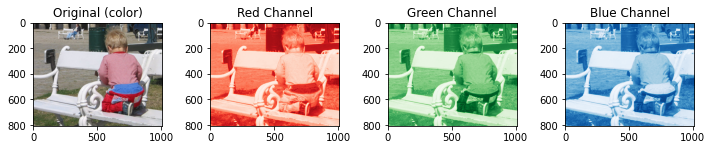

In [106]:
# PART 1
# Display original image with each color channel

img_red = img[:,:,0]
img_green = img[:,:,1]
img_blue = img[:,:,2]

images = [
    img_original,
    ("Red Channel", (img_red, {"cmap": plt.cm.Reds_r})),
    ("Green Channel", (img_green, {"cmap": plt.cm.Greens_r})),
    ("Blue Channel", (img_blue, {"cmap": plt.cm.Blues_r}))
]
# Display the color channels and original image
display_images(images)

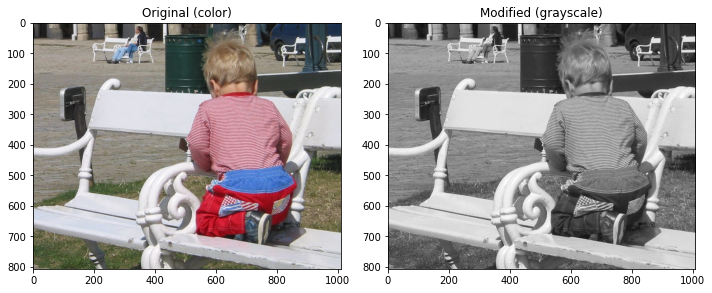

In [107]:
# PART 2
# Display original image with grayscale image

# Create grayscale image
img_gray = rgb2gray(img)

images = [
    img_original,
    ("Modified (grayscale)", (img_gray, {"cmap": plt.cm.gray}))
]

display_images(images)

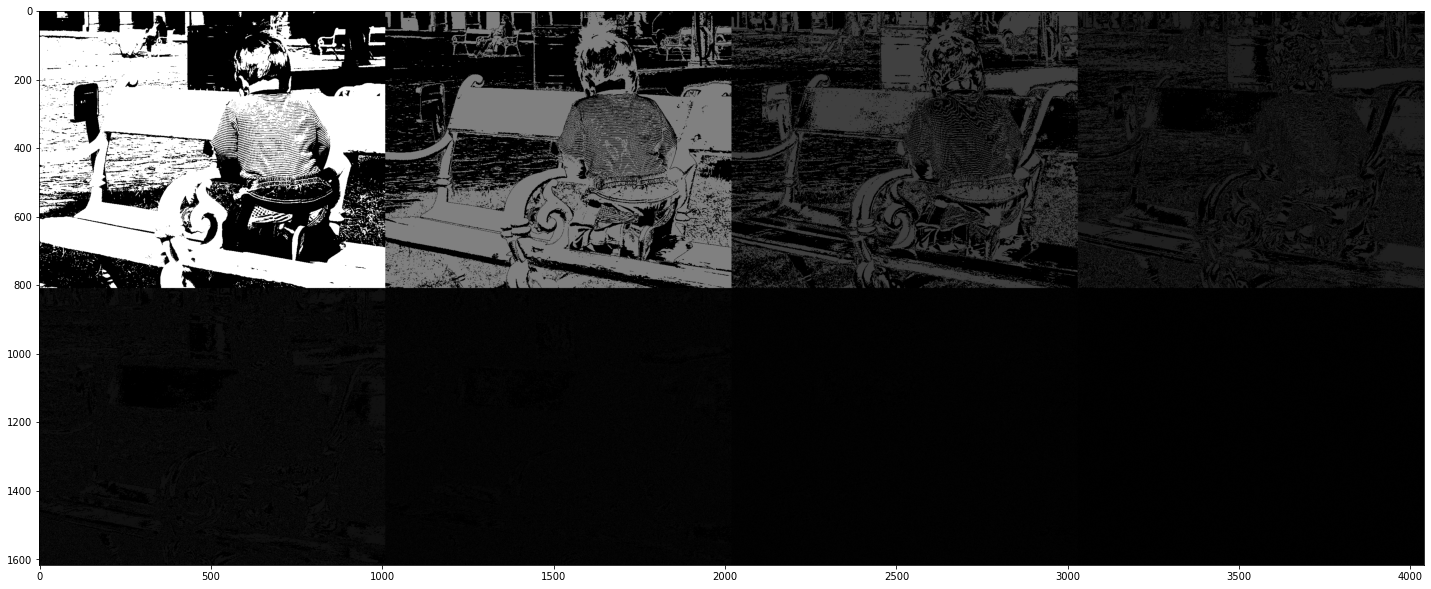

In [108]:
# PART 2 CTD.
# Display the 8-bit planes of the grayscale image
#   Source: https://theailearner.com/2019/01/25/bit-plane-slicing/
#   Modified work for this assignment

import cv2

img = cv2.imread(img_location, 0)

#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits

# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])

#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])

# Vertically concatenate
final = cv2.vconcat([finalr,finalv])

# Display the images
plt.figure(figsize=(20,10))
plt.imshow(final, cmap=plt.cm.gray)
plt.tight_layout()

# Reasserting image
img = io.imread(img_location)


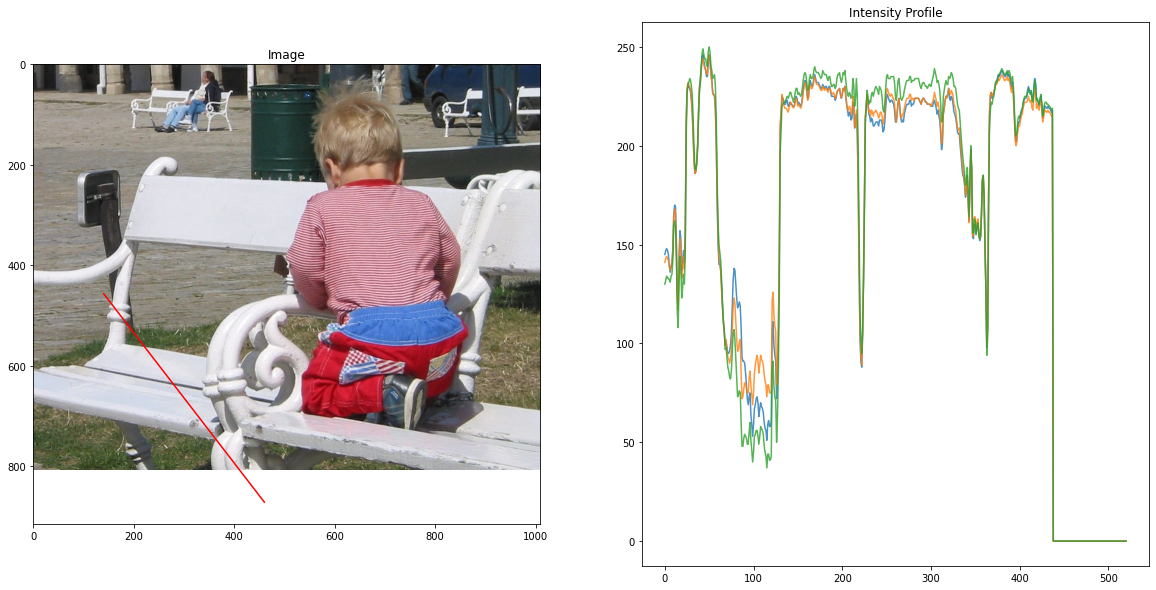

In [109]:
# PART 3
# Display the intensity profile along the line
#   from [460,140] to [872,457]

def get_profile(img, src, dst):
  return measure.profile_line(img, src=src, dst=dst)

def intensity_profile(img, src, dst):
  fig, ax = plt.subplots(1,2, figsize=(20,10))
  ax[0].set_title('Image')
  ax[0].imshow(img)
  ax[0].plot(src, dst, 'r')
  ax[1].set_title('Intensity Profile')
  ax[1].plot(get_profile(img, src, dst), alpha=0.8)

s = (r1,c1) = (460,140)
d = (r2,c2) = (872,457)
intensity_profile(img, s, d)

# Part 3 ctd.
---
**Describe the part of the image that this intensity line covers roughly between distance values 200 to 400 along the line?**

As you can see, I plotted a line along the profile we are measuring.  This is the bottom left of the image along a linear, angular line from mid-left on the bench to bottom-middle (around).  The bottom of the line goes off of the actual area of the image.

**What do you see happening hear?  Explain the phenomenon.**

This is really interesting because it shows all of the colors and their intensities along the plotted line.  The phenomenon I see is that when the line goes off the image, the intensity drops immediately to 0.  This is because the blank area isn't actually white but transparent and I believe automatically (0,0,0).

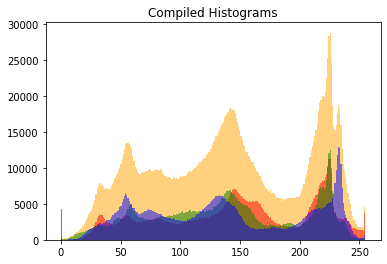

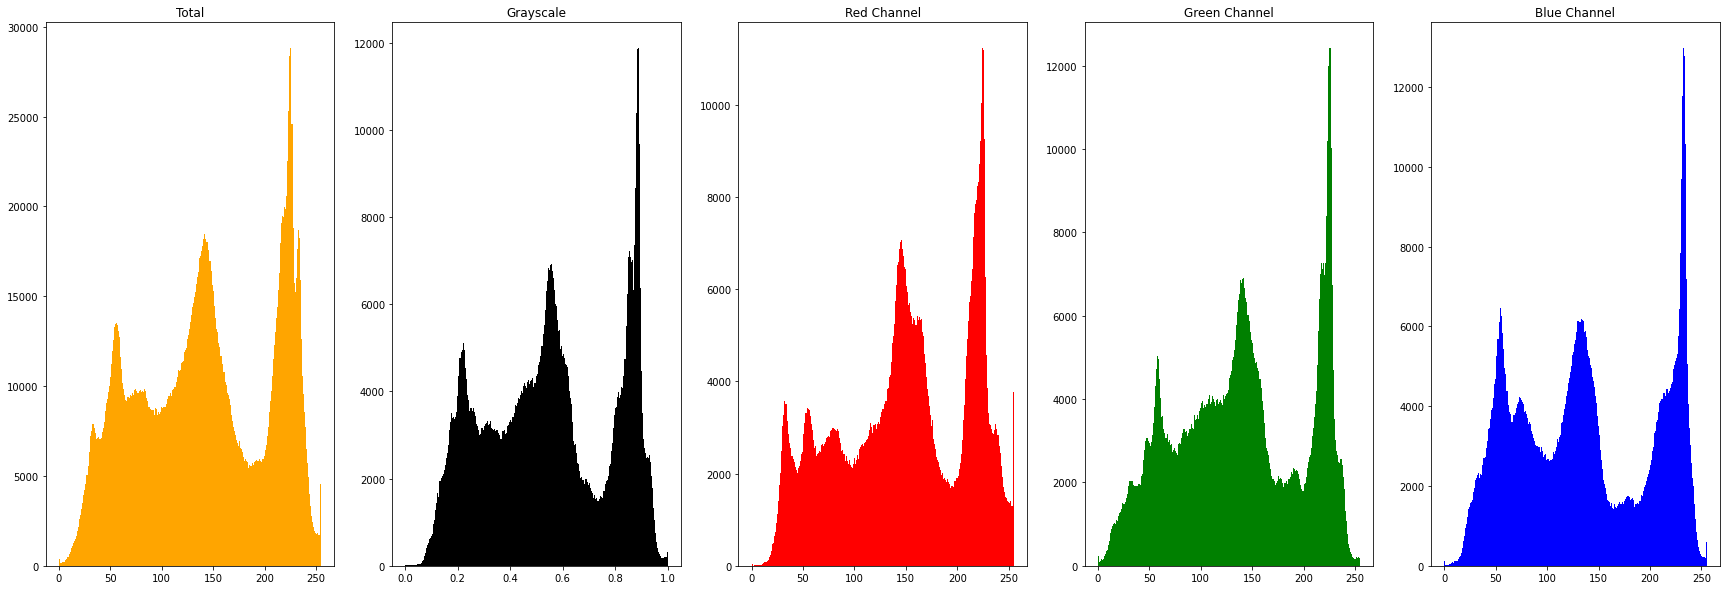

In [110]:
# PART 4
# Plot the histograms for RGB color channels and grayscale image

plt.hist(img.ravel(), bins=256, color='orange', alpha=0.5)
plt.hist(img_gray.ravel(), bins=256, color='black', alpha=0.5)
plt.hist(img_red.ravel(), bins=256, color='red', alpha=0.5)
plt.hist(img_green.ravel(), bins=256, color='green', alpha=0.5)
plt.hist(img_blue.ravel(), bins=256, color='blue', alpha=0.5)
plt.title("Compiled Histograms")
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(30,10))
ax = axes.ravel()
ax[0].hist(img.ravel(), bins=256, color='orange')
ax[0].set_title("Total")
ax[1].hist(img_gray.ravel(), bins=256, color='black')
ax[1].set_title("Grayscale")
ax[2].hist(img_red.ravel(), bins=256, color='red')
ax[2].set_title("Red Channel")
ax[3].hist(img_green.ravel(), bins=256, color='green')
ax[3].set_title("Green Channel")
ax[4].hist(img_blue.ravel(), bins=256, color='blue')
ax[4].set_title("Blue Channel")
plt.show()

In [111]:
# PART 5
# Implement 5 operations on an image

# Implement adding/subtracting/multiplying 2 images
# Perform the operations on 2 images
def alg_img(img1, img2, op='+'):
  if op == '-':
    return img1 - img2
  elif op == '*':
    return img1 * img2
  elif op == '/':
    return img1 / img2
  return img1 + img2
# Call and display the operations on 2 images
#   img1: Image being operated on
def display_alg(img1, img2):
  # Resize images
  img1 = transform.resize(img1, (400,400), anti_aliasing=True)
  img2 = transform.resize(img2, (400,400), anti_aliasing=True)

  ops = [
      '+', '-', '*', '/'
  ]
  imgs = []
  for op in ops:
    imgs.append(("'" + op + "' Operation", (alg_img(img1, img2, op), {})))
  display_images(imgs)

# Rotates an image by 10 degrees
def rotate_image(img):
  img_putty = img.copy()
  img_putty = transform.rotate(img_putty, 10, resize=True)
  plt.imshow(img_putty)
  plt.show()

# Affine transformation
def affine_transform(img, shear):
  form = transform.AffineTransform(shear=shear)
  img_transform = transform.warp(img, form.inverse)
  plt.imshow(img_transform)
  plt.show()

# Laplacian filter on an image
def laplacian_filter(img):
  edges = filters.laplace(img)
  io.imshow(edges)
  plt.title("Laplacian Filter")
  io.show()

# Edge detection on an image
def edge_detection(img):
  edges = filters.sobel(img)
  io.imshow(edges)
  plt.title("Edge Detection")
  io.show()

# Hough Transform of an image
def hough_transform(img):
  # Source: skimage documentation 
  img = rgb2gray(img)
  edges = feature.canny(img)
  lines = transform.probabilistic_hough_line(edges, threshold=10, line_length=5,
                                  line_gap=3)

  # Generating figure 2
  fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
  ax = axes.ravel()

  ax[0].imshow(img, cmap=plt.cm.gray)
  ax[0].set_title('Input image')

  ax[1].imshow(edges, cmap=plt.cm.gray)
  ax[1].set_title('Canny edges')

  ax[2].imshow(edges * 0)
  for line in lines:
      p0, p1 = line
      ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
  ax[2].set_xlim((0, img.shape[1]))
  ax[2].set_ylim((img.shape[0], 0))
  ax[2].set_title('Probabilistic Hough')

  for a in ax:
      a.set_axis_off()

  plt.tight_layout()
  plt.title("Hough Transform")
  plt.show()

Adding/Subtracting/Multiplying/Dividing 2 Images:


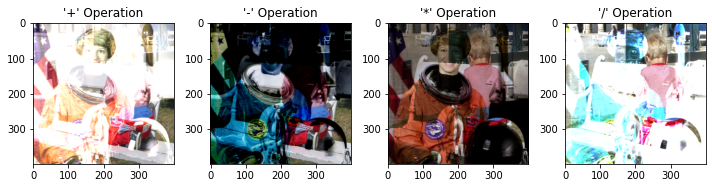

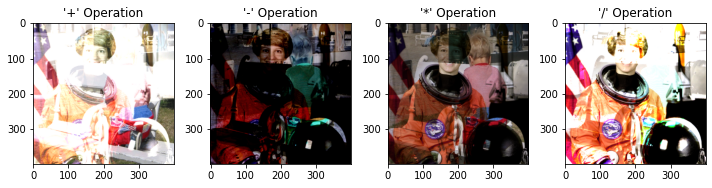

Affine Transformation:


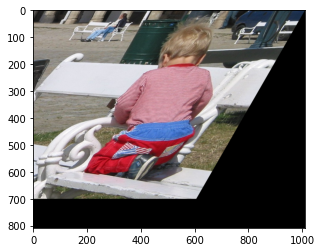

Rotate Image by 10 Degrees:


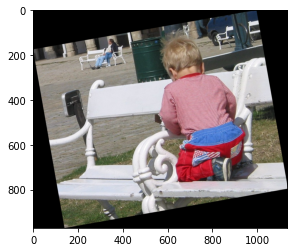

Laplacian Filter:


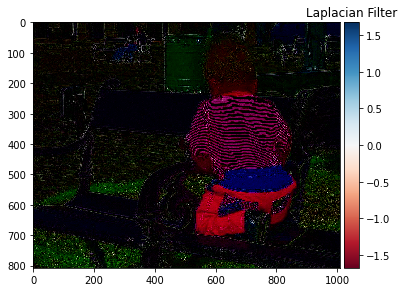

Edge Detection:


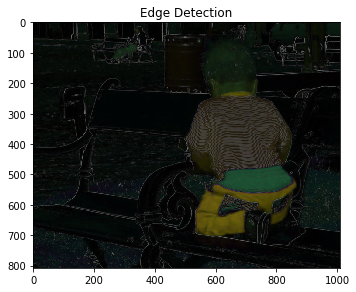

Hough Transform:


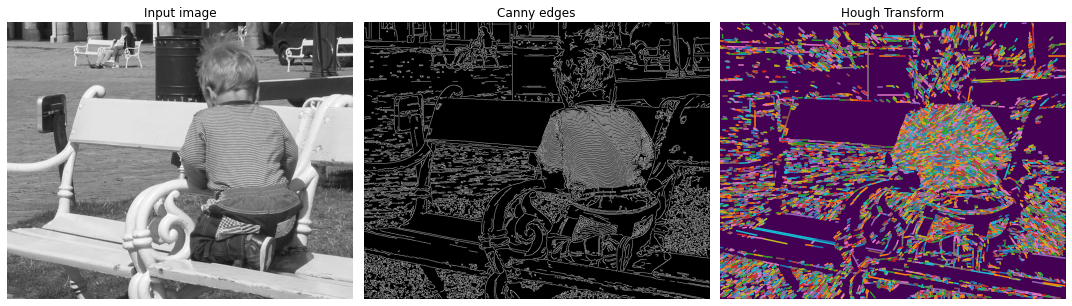

In [112]:
# PART 5 CTD.
# Testing implementations

print("Adding/Subtracting/Multiplying/Dividing 2 Images:")
# Forwards and backwards operations
imgs1 = (img, data.astronaut())
imgs2 = (data.astronaut(), img)
display_alg(*imgs1)
display_alg(*imgs2)

print("Affine Transformation:"); affine_transform(img, (np.pi/6))
print("Rotate Image by 10 Degrees:"); rotate_image(img)
print("Laplacian Filter:"); laplacian_filter(img)
print("Edge Detection:"); edge_detection(img)
print("Hough Transform:"); hough_transform(img)

# Sources
---
- skimage manual: https://scikit-image.org/docs/stable/user_guide.html
- TheAILearner: https://theailearner.com/
- StackOverflow